In [50]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time
from tqdm.notebook import tqdm
from glob import glob
import os
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import json
import folium
import warnings
import numpy

In [2]:
options = webdriver.ChromeOptions()

prefs = {'download.default_directory':'/home/j-hyungjun/dev_ws/EDA/data',
         'download.prompt_for_download':False}
options.add_experimental_option('prefs', prefs)

url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome(service=Service("../driver/chromedriver"),
                          options=options)
driver.get(url)

In [3]:
driver.get(url)

In [4]:
sido = driver.find_element(By.ID, "SIDO_NM0")
sido_list = sido.find_elements(By.TAG_NAME, "option")
for idx, sido_name in enumerate(sido_list):
    print(str(idx) + ". " + sido_name.get_attribute("value"))

0. 
1. 서울특별시
2. 부산광역시
3. 대구광역시
4. 인천광역시
5. 광주광역시
6. 대전광역시
7. 울산광역시
8. 세종특별자치시
9. 경기도
10. 강원특별자치도
11. 충청북도
12. 충청남도
13. 전북특별자치도
14. 전라남도
15. 경상북도
16. 경상남도
17. 제주특별자치도


In [5]:
sido_names = [sido_name.get_attribute("value") for sido_name in sido_list]
sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [6]:
sido_names = sido_names[1:]
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [7]:
len(sido_names)

17

In [8]:
print(sido_names[1])
sido.send_keys(sido_names[1])

부산광역시


In [8]:
print(sido_names[0])
sido.send_keys(sido_names[0])

서울특별시


In [9]:
gu = driver.find_element(By.ID, "SIGUNGU_NM0")
gu_list = gu.find_elements(By.TAG_NAME, "option")

gu_names = [gu_name.get_attribute("value") for gu_name in gu_list]
print(len(gu_names), gu_names)

26 ['', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [10]:
gu_names.remove('')
print(len(gu_names), gu_names)

25 ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [11]:
gu.send_keys(gu_names[15])

In [12]:
for gu_name in tqdm(gu_names [:3]):
    gu = driver.find_element(By.ID, "SIGUNGU_NM0")
    gu.send_keys(gu_name)
    time.sleep(3)

  0%|          | 0/3 [00:00<?, ?it/s]

In [13]:
driver.find_element(By.ID, "glopopd_excel").click()

In [17]:
for gu_name in tqdm(gu_names):
    gu = driver.find_element(By.ID, "SIGUNGU_NM0")
    gu.send_keys(gu_name)
    driver.implicitly_wait(3)

    driver.find_element(By.ID, "glopopd_excel").click()

  0%|          | 0/25 [00:00<?, ?it/s]

In [18]:
len(glob("../data/지역_*"))

0

In [28]:
for file in glob("../data/지역_*"):
    os.remove(file)

len(glob("../data/지역_*"))

0

In [14]:
for gu_name in tqdm(gu_names):
    gu = driver.find_element(By.ID, "SIGUNGU_NM0")
    gu.send_keys(gu_name)

    save = WebDriverWait(driver, timeout=30).until(EC.element_to_be_clickable((By.ID, "glopopd_excel")))
    ActionChains(driver).move_to_element(save).perform()
    save.send_keys(Keys.ENTER)

    time.sleep(1)

len(glob("../data/지역_*"))

  0%|          | 0/25 [00:00<?, ?it/s]

25

In [15]:
file_list = glob("../data/지역_*")
print(len(file_list))
file_list

25


['../data/지역_위치별(주유소) (8).xls',
 '../data/지역_위치별(주유소) (9).xls',
 '../data/지역_위치별(주유소) (17).xls',
 '../data/지역_위치별(주유소) (1).xls',
 '../data/지역_위치별(주유소) (24).xls',
 '../data/지역_위치별(주유소) (11).xls',
 '../data/지역_위치별(주유소) (10).xls',
 '../data/지역_위치별(주유소) (15).xls',
 '../data/지역_위치별(주유소) (16).xls',
 '../data/지역_위치별(주유소) (7).xls',
 '../data/지역_위치별(주유소) (18).xls',
 '../data/지역_위치별(주유소) (14).xls',
 '../data/지역_위치별(주유소) (20).xls',
 '../data/지역_위치별(주유소) (23).xls',
 '../data/지역_위치별(주유소) (19).xls',
 '../data/지역_위치별(주유소) (12).xls',
 '../data/지역_위치별(주유소) (21).xls',
 '../data/지역_위치별(주유소) (2).xls',
 '../data/지역_위치별(주유소) (6).xls',
 '../data/지역_위치별(주유소) (13).xls',
 '../data/지역_위치별(주유소) (5).xls',
 '../data/지역_위치별(주유소) (4).xls',
 '../data/지역_위치별(주유소).xls',
 '../data/지역_위치별(주유소) (22).xls',
 '../data/지역_위치별(주유소) (3).xls']

In [16]:
driver.close()

In [18]:
data = pd.read_excel(file_list[0], header=2)
data.tail(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
12,서울특별시,신성주유소,서울 노원구 월계로 328 (월계동),S-OIL,02-916-4334,Y,-,1688,1588,-
13,서울특별시,하계삼호주유소,서울 노원구 공릉로 294 (하계동),GS칼텍스,02-974-8818,N,-,1755,1695,-


In [19]:
data_list = []

for file in file_list:
    data = pd.read_excel(file, header=2)
    data_list.append(data)

oil_data = pd.concat(data_list)
len(oil_data)

440

In [20]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 0 to 32
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      440 non-null    object
 1   상호      440 non-null    object
 2   주소      440 non-null    object
 3   상표      440 non-null    object
 4   전화번호    440 non-null    object
 5   셀프여부    440 non-null    object
 6   고급휘발유   440 non-null    object
 7   휘발유     440 non-null    object
 8   경유      440 non-null    object
 9   실내등유    440 non-null    object
dtypes: object(10)
memory usage: 37.8+ KB


In [21]:
oil_data = pd.DataFrame({"상호": oil_data["상호"],
                         "주소": oil_data["주소"],
                         "가격": oil_data["휘발유"],
                         "셀프": oil_data["셀프여부"],
                         "상표": oil_data["상표"]})
oil_data.tail()

,상호,주소,가격,셀프,상표
28,(주)한진 김포공항제2주유소,서울 강서구 하늘길 112,1717,Y,S-OIL
29,박물관주유소,서울 강서구 양천로53길 97 (가양동),1748,N,GS칼텍스
30,코리나(주)청룡주유소,서울 강서구 양천로 576,1768,N,SK에너지
31,참솔에너지,서울 강서구 벌말로 281 (오곡동),1865,Y,S-OIL
32,염창동주유소,서울 강서구 양천로 720 (염창동),1935,N,SK에너지


In [22]:
oil_data.reset_index(drop=True, inplace=True)
oil_data.tail()

,상호,주소,가격,셀프,상표
435,(주)한진 김포공항제2주유소,서울 강서구 하늘길 112,1717,Y,S-OIL
436,박물관주유소,서울 강서구 양천로53길 97 (가양동),1748,N,GS칼텍스
437,코리나(주)청룡주유소,서울 강서구 양천로 576,1768,N,SK에너지
438,참솔에너지,서울 강서구 벌말로 281 (오곡동),1865,Y,S-OIL
439,염창동주유소,서울 강서구 양천로 720 (염창동),1935,N,SK에너지


In [23]:
oil_data["구"] = [address.split()[1] for address in oil_data["주소"]]
oil_data.head()

,상호,주소,가격,셀프,상표,구
0,구도일주유소 불암,서울 노원구 한글비석로 268 (중계동),1610,Y,S-OIL,노원구
1,월계주유소,서울 노원구 월계로 252 (월계동),1615,Y,GS칼텍스,노원구
2,이엠석유(주)배꽃나라주유소,서울 노원구 화랑로 466 (공릉1동),1625,Y,GS칼텍스,노원구
3,(주)정건에너지직영,서울 노원구 노원로17길 29 (하계동),1625,Y,HD현대오일뱅크,노원구
4,화랑대주유소,서울 노원구 화랑로 483,1635,Y,HD현대오일뱅크,노원구


In [24]:
oil_data["구"].unique(), len(oil_data["구"].unique())

(array(['노원구', '도봉구', '송파구', '강동구', '중랑구', '동작구', '동대문구', '성동구', '성북구',
        '금천구', '양천구', '서초구', '용산구', '중구', '영등포구', '마포구', '은평구', '강북구',
        '구로구', '서대문구', '광진구', '관악구', '강남구', '종로구', '강서구'], dtype=object),
 25)

In [25]:
oil_data["가격"] = oil_data["가격"].astype("float")

ValueError: could not convert string to float: '-'

In [26]:
oil_data[oil_data["가격"] == "-"]

,상호,주소,가격,셀프,상표,구
127,삼우주유소,서울 성동구 천호대로 392,-,N,SK에너지,성동구
266,도림주유소,서울 영등포구 도림로 343 (도림동),-,Y,알뜰주유소,영등포구
323,JHC에너지,서울 구로구 시흥대로 539,-,N,HD현대오일뱅크,구로구


In [30]:
oil_data[oil_data["가격"] != "-"]
oil_data.head()

,상호,주소,가격,셀프,상표,구
0,구도일주유소 불암,서울 노원구 한글비석로 268 (중계동),1610,Y,S-OIL,노원구
1,월계주유소,서울 노원구 월계로 252 (월계동),1615,Y,GS칼텍스,노원구
2,이엠석유(주)배꽃나라주유소,서울 노원구 화랑로 466 (공릉1동),1625,Y,GS칼텍스,노원구
3,(주)정건에너지직영,서울 노원구 노원로17길 29 (하계동),1625,Y,HD현대오일뱅크,노원구
4,화랑대주유소,서울 노원구 화랑로 483,1635,Y,HD현대오일뱅크,노원구


In [31]:
oil_data["가격"] = pd.to_numeric(oil_data["가격"], errors='coerce')

In [32]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      440 non-null    object 
 1   주소      440 non-null    object 
 2   가격      437 non-null    float64
 3   셀프      440 non-null    object 
 4   상표      440 non-null    object 
 5   구       440 non-null    object 
dtypes: float64(1), object(5)
memory usage: 20.8+ KB


In [33]:
oil_data

,상호,주소,가격,셀프,상표,구
0,구도일주유소 불암,서울 노원구 한글비석로 268 (중계동),1610.0,Y,S-OIL,노원구
1,월계주유소,서울 노원구 월계로 252 (월계동),1615.0,Y,GS칼텍스,노원구
2,이엠석유(주)배꽃나라주유소,서울 노원구 화랑로 466 (공릉1동),1625.0,Y,GS칼텍스,노원구
3,(주)정건에너지직영,서울 노원구 노원로17길 29 (하계동),1625.0,Y,HD현대오일뱅크,노원구
4,화랑대주유소,서울 노원구 화랑로 483,1635.0,Y,HD현대오일뱅크,노원구
...,...,...,...,...,...,...
435,(주)한진 김포공항제2주유소,서울 강서구 하늘길 112,1717.0,Y,S-OIL,강서구
436,박물관주유소,서울 강서구 양천로53길 97 (가양동),1748.0,N,GS칼텍스,강서구
437,코리나(주)청룡주유소,서울 강서구 양천로 576,1768.0,N,SK에너지,강서구
438,참솔에너지,서울 강서구 벌말로 281 (오곡동),1865.0,Y,S-OIL,강서구


In [34]:
oil_data.reset_index(drop=True, inplace=True)
oil_data.head()

,상호,주소,가격,셀프,상표,구
0,구도일주유소 불암,서울 노원구 한글비석로 268 (중계동),1610.0,Y,S-OIL,노원구
1,월계주유소,서울 노원구 월계로 252 (월계동),1615.0,Y,GS칼텍스,노원구
2,이엠석유(주)배꽃나라주유소,서울 노원구 화랑로 466 (공릉1동),1625.0,Y,GS칼텍스,노원구
3,(주)정건에너지직영,서울 노원구 노원로17길 29 (하계동),1625.0,Y,HD현대오일뱅크,노원구
4,화랑대주유소,서울 노원구 화랑로 483,1635.0,Y,HD현대오일뱅크,노원구


<Axes: title={'center': '가격'}, xlabel='셀프'>

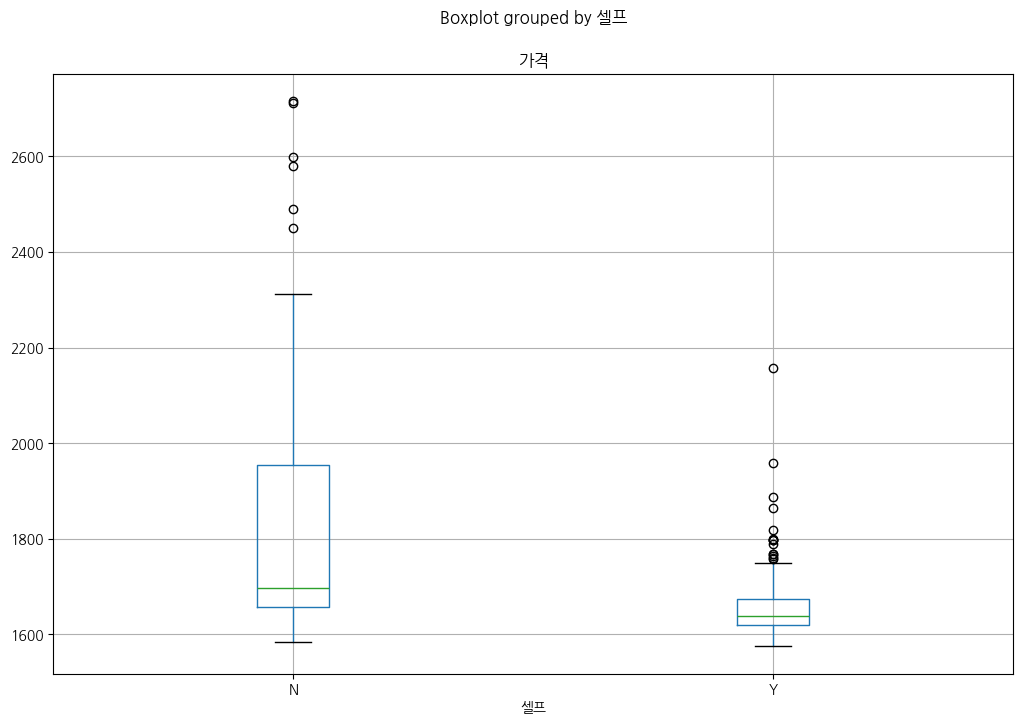

In [36]:
oil_data.boxplot(column="가격", by="셀프", figsize=(12, 8))

/tmp/ipykernel_12144/1403898688.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="셀프", y="가격", data=oil_data, palette="Set1")


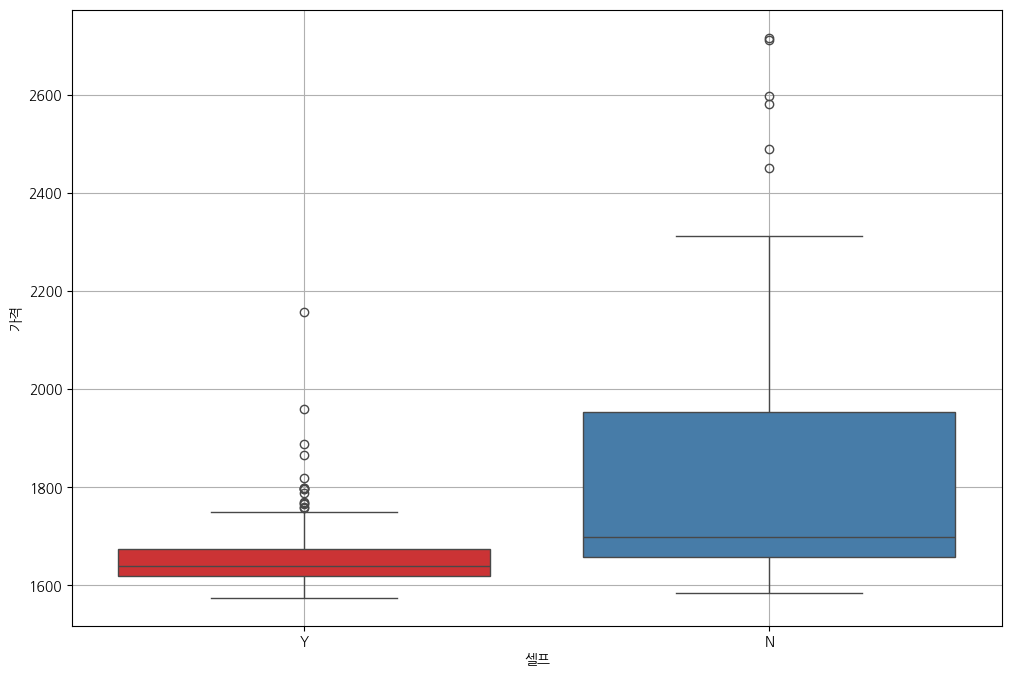

In [37]:
plt.figure(figsize=(12,8))
sns.boxplot(x="셀프", y="가격", data=oil_data, palette="Set1")
plt.grid(True)
plt.show()

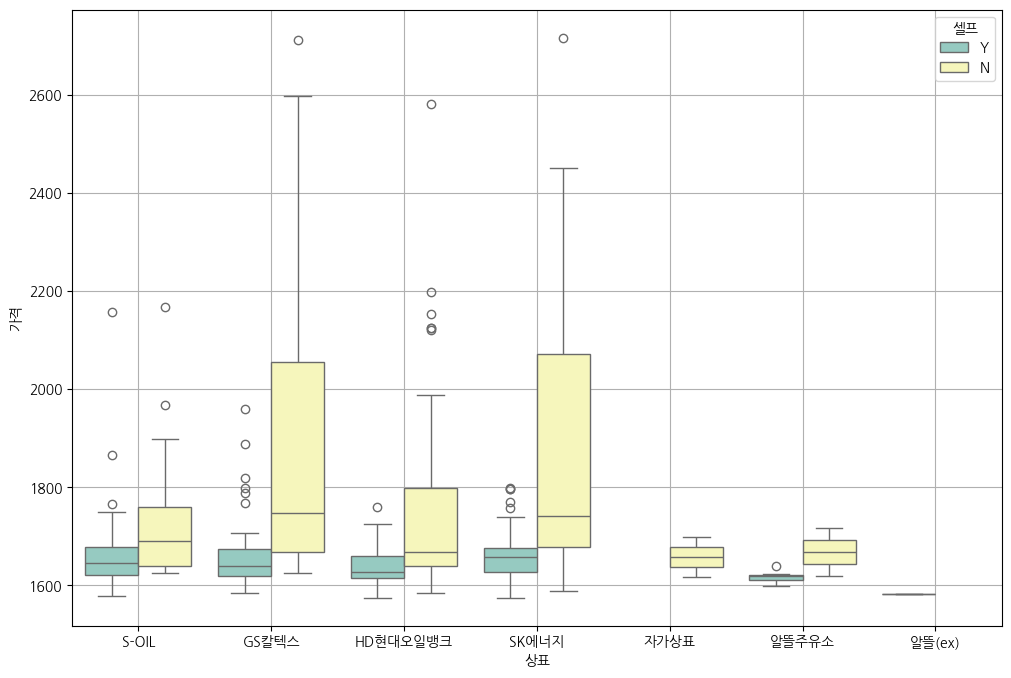

In [38]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=oil_data, palette="Set3")
plt.grid(True)
plt.show()

In [40]:
warnings.simplefilter(action="ignore", category=FutureWarning)

In [42]:
oil_data.sort_values(by="가격", ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
238,서남주유소,서울 중구 통일로 30,2716.0,N,SK에너지,중구
228,서계주유소,서울 용산구 청파로 367 (청파동),2712.0,N,GS칼텍스,용산구
397,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구
396,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2580.0,N,HD현대오일뱅크,강남구
237,필동주유소,서울 중구 퇴계로 196 (필동2가),2489.0,N,GS칼텍스,중구
395,SK논현주유소,서울 강남구 논현로 747 (논현동),2450.0,N,SK에너지,강남구
227,한석주유소,서울 용산구 이촌로 164,2312.0,N,SK에너지,용산구
406,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2295.0,N,GS칼텍스,종로구
265,SJ오일(주) 여의도주유소,서울 영등포구 은행로 64,2295.0,N,GS칼텍스,영등포구
405,경복궁주유소,서울 종로구 율곡로 6 (중학동),2290.0,N,GS칼텍스,종로구


In [43]:
oil_data.sort_values(by="가격", ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
240,영등포제일셀프주유소,서울 영등포구 가마산로 379,1575.0,Y,HD현대오일뱅크,영등포구
239,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1575.0,Y,SK에너지,영등포구
267,(주)타이거통상 월드컵주유소,서울 마포구 월드컵북로 170 (성산제2동),1579.0,Y,S-OIL,마포구
186,만남의광장주유소,서울 서초구 양재대로12길 73-71,1582.0,Y,알뜰(ex),서초구
279,(주)디오티디 은평유니콘주유소,서울 은평구 통일로 1151 (진관동),1584.0,N,HD현대오일뱅크,은평구
242,성락주유소,서울 영등포구 가마산로 414 (신길동),1585.0,Y,S-OIL,영등포구
241,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1585.0,Y,GS칼텍스,영등포구
268,마포시엠주유소,서울 마포구 월드컵북로 62,1589.0,N,SK에너지,마포구
15,오복주유소,서울 도봉구 방학로 43,1590.0,Y,S-OIL,도봉구
14,이케이에너지 주식회사,서울 도봉구 도봉로 941 (도봉동),1590.0,Y,HD현대오일뱅크,도봉구


In [45]:
gu_data = pd.pivot_table(data=oil_data, index="구", values="가격", aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1914.687500
강동구,1736.500000
강북구,1618.416667
강서구,1673.666667
관악구,1693.714286


In [48]:
geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="OpenStreetMap")
folium.Choropleth(geo_data=geo_str,
               data=gu_data,
               columns=[gu_data.index, "가격"],
               key_on="feature.id",
               fill_color="PuRd").add_to(map)

map